In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
file_path = "/content/web_scraping_csv.csv"
data = pd.read_csv(file_path, encoding='latin1')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LAPTOP URL        386 non-null    object
 1   RATING            386 non-null    object
 2   NUMBER OF RATING  386 non-null    object
 3   LAPTOP NAME       386 non-null    object
 4   DISCOUNTED PRICE  386 non-null    object
 5   ACTUAL PRICE      386 non-null    object
 6   DISCOUNT          386 non-null    object
dtypes: object(7)
memory usage: 21.2+ KB
None


In [5]:
print(data.describe(include='all'))

                                               LAPTOP URL              RATING  \
count                                                 386                 386   
unique                                                385                  27   
top     https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  4.0 out of 5 stars   
freq                                                    2                  73   

       NUMBER OF RATING                                        LAPTOP NAME  \
count               386                                                386   
unique              136                                                311   
top                   1  Lenovo IdeaPad Slim 5 13th Gen Intel Core i5 1...   
freq                 19                                                  3   

       DISCOUNTED PRICE ACTUAL PRICE   DISCOUNT  
count               386          386        386  
unique              208          252         66  
top              51,990      ?89,999  (32% off)  
fre

In [6]:
data['RATING'] = data['RATING'].str.extract(r'(\d+\.\d+)').astype(float)

In [7]:
data['NUMBER OF RATING'] = data['NUMBER OF RATING'].str.replace(',', '').astype(int)

In [9]:
data['DISCOUNT'] = data['DISCOUNT'].str.extract(r'(\d+)%').astype(float)

In [27]:
# Convert 'DISCOUNTED PRICE' and 'ACTUAL PRICE' back to string type before applying string methods
data['DISCOUNTED PRICE'] = data['DISCOUNTED PRICE'].astype(str)
data['ACTUAL PRICE'] = data['ACTUAL PRICE'].astype(str)

# Now you can proceed with your string replacements
data['DISCOUNTED PRICE'] = data['DISCOUNTED PRICE'].str.replace(r'[\?,]', '', regex=True)
data['ACTUAL PRICE'] = data['ACTUAL PRICE'].str.replace(r'[\?,]', '', regex=True)

# If you want them as integers, convert them after the string operations
data['DISCOUNTED PRICE'] = data['DISCOUNTED PRICE'].astype(int, errors='ignore')
data['ACTUAL PRICE'] = data['ACTUAL PRICE'].astype(int, errors='ignore')

In [16]:
data['BRAND'] = data['LAPTOP NAME'].apply(lambda x: x.split()[0])


brand_ratings = data.groupby('BRAND')['NUMBER OF RATING'].sum().reset_index()


total_ratings = brand_ratings['NUMBER OF RATING'].sum()
brand_ratings['MARKET SHARE'] = (brand_ratings['NUMBER OF RATING'] / total_ratings) * 100

print(brand_ratings)

fig = px.pie(brand_ratings, names='BRAND', values='MARKET SHARE', title='Market Share of Top-Selling Brands')
fig.show()

            BRAND  NUMBER OF RATING  MARKET SHARE
0   (Refurbished)               975      0.868891
1       (Renewed)               333      0.296760
2            ASUS             15523     13.833636
3             AXL               498      0.443803
4            Acer             11497     10.245785
5           Apple               194      0.172887
6           Chuwi             12621     11.247460
7            Dell              8498      7.573165
8         FUTOPIA                69      0.061491
9        GIGABYTE                 4      0.003565
10       HOMELAND               666      0.593519
11          HONOR              1620      1.443696
12             HP             41715     37.175168
13             Hp                 1      0.000891
14        Infinix                 5      0.004456
15        JioBook               248      0.221010
16         Lenovo             15194     13.540441
17            MSI               622      0.554308
18      Primebook                 5      0.004456


In [18]:
top_5_laptops = data.groupby('BRAND').apply(lambda x: x.nlargest(5, 'NUMBER OF RATING')).reset_index(drop=True)


print(top_5_laptops)

top_rated = data.nlargest(5, 'RATING')

fig = px.bar(top_rated, x='LAPTOP NAME', y='RATING', title='Top 10 Rated Laptops')
fig.show()

                                           LAPTOP URL  RATING  \
0   https://www.amazon.in/Refurbished-Lenovo-Think...     3.9   
1   https://www.amazon.in/Refurbished-Lenovo-Think...     3.9   
2   https://www.amazon.in/Refurbished-Lenovo-Think...     4.0   
3   https://www.amazon.in/Refurbished-HP-Windows-B...     3.8   
4   https://www.amazon.in/Refurbished-HP-Windows-B...     3.8   
..                                                ...     ...   
75  https://www.amazon.in/ZEBRONICS-5S-1TB-Midnigh...     3.6   
76  https://www.amazon.in/Lenovo-IdeaPad-39-62cm-3...     4.1   
77  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     4.1   
78  https://www.amazon.in/realme-Book-Slim-Core-11...     3.5   
79  https://www.amazon.in/realme-Book-Slim-Core-11...     3.5   

    NUMBER OF RATING                                        LAPTOP NAME  \
0                239  (Refurbished) Lenovo ThinkPad 7th Gen Intel Co...   
1                239  (Refurbished) Lenovo ThinkPad 7th Gen Intel Co.

            BRAND    RATING
0   (Refurbished)  3.914286
1       (Renewed)  3.050000
2            ASUS  3.985294
3             AXL  3.200000
4            Acer  3.723077
5           Apple  3.860000
6           Chuwi  3.716667
7            Dell  3.595122
8         FUTOPIA  3.400000
9        GIGABYTE  3.300000
10       HOMELAND  3.900000
11          HONOR  4.150000
12             HP  3.820779
13             Hp  5.000000
14        Infinix  3.700000
15        JioBook  3.000000
16         Lenovo  4.016279
17            MSI  3.900000
18      Primebook  4.000000
19        Samsung  3.311111
20      ZEBRONICS  3.675000
21         [Smart  4.100000
22         realme  3.500000


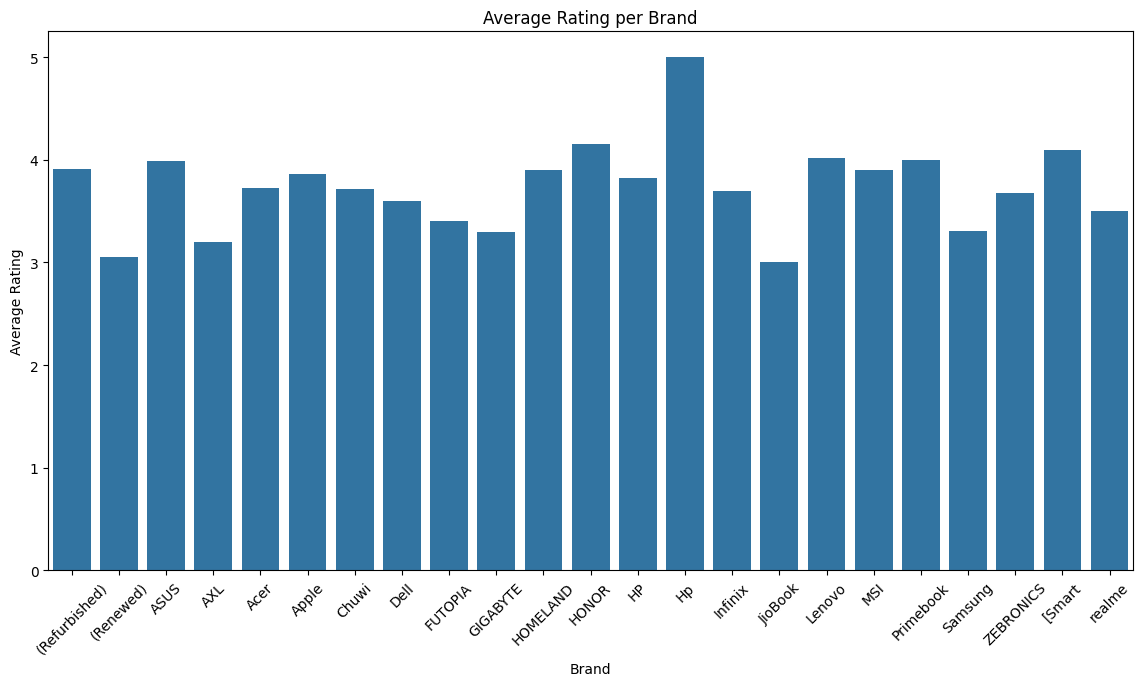

In [19]:
# Calculate the average rating for each brand
average_rating_per_brand = data.groupby('BRAND')['RATING'].mean().reset_index()

# Display the average rating per brand
print(average_rating_per_brand)

# Plotting the average rating per brand
plt.figure(figsize=(14, 7))
sns.barplot(x='BRAND', y='RATING', data=average_rating_per_brand)
plt.title('Average Rating per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


In [10]:
print(data.head(386))

                                            LAPTOP URL  RATING  \
0    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     3.8   
1    https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     3.8   
2    https://www.amazon.in/HP-15-6inch-Micro-Edge-A...     4.1   
3    https://aax-eu.amazon.in/x/c/RL5rd2U6Rq0lL2ebo...     3.8   
4    https://www.amazon.in/ASUS-Vivobook-35-56-1920...     4.0   
..                                                 ...     ...   
381  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     2.0   
382  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     2.7   
383  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     4.0   
384  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     3.6   
385  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...     4.0   

     NUMBER OF RATING                                        LAPTOP NAME  \
0                 663  Dell [Smartchoice 15 Thin & Light Laptop, 12th...   
1                  16  Lenovo ThinkBook 15 G5 Ryzen 7 1

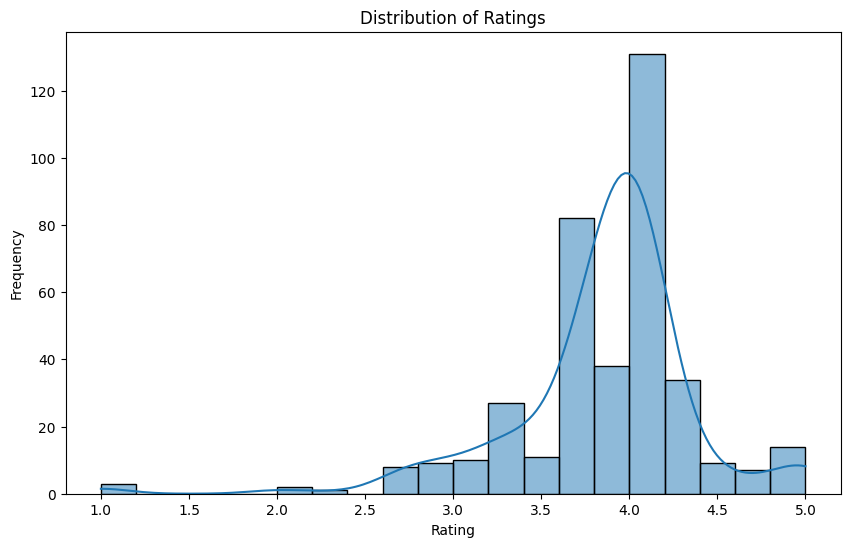

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

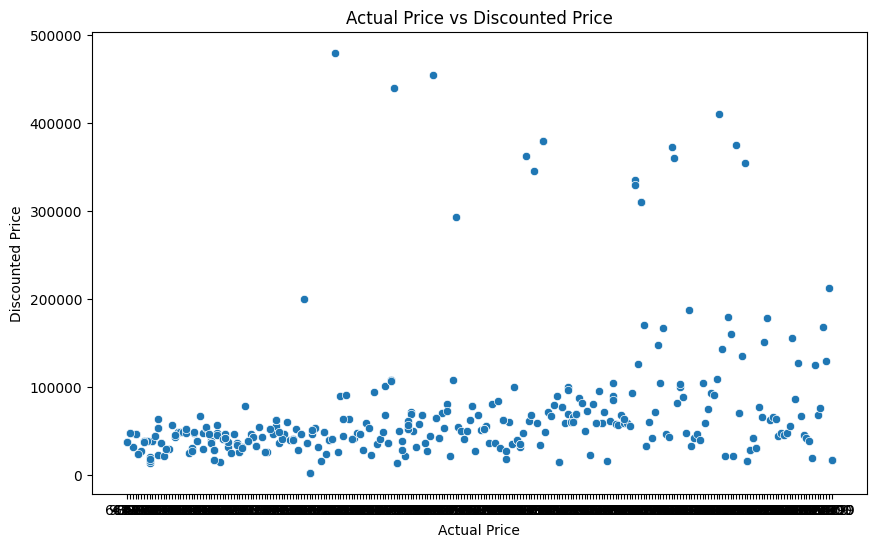

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ACTUAL PRICE'], y=data['DISCOUNTED PRICE'])
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

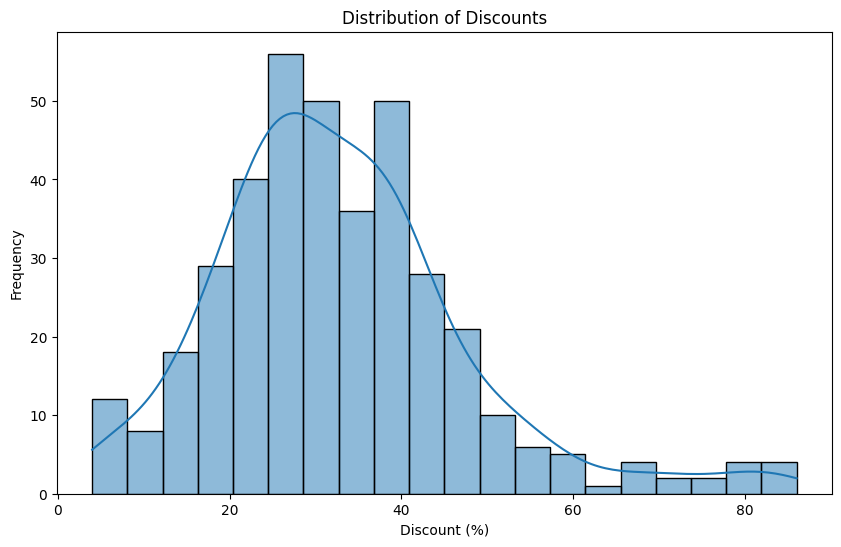

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DISCOUNT'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()


In [14]:
top_rated = data.nlargest(10, 'RATING')

In [15]:

fig = px.bar(top_rated, x='LAPTOP NAME', y='RATING', title='Top 10 Rated Laptops')
fig.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
